# Equity Return Factor Analysis

**Goal:** To analyze equity returns using classical and statistical factor models. We evaluate how well different factor structures explain asset returns and assess their risk characteristics.

Specifically, comparing:
- CAPM
- Fama-French 3-Factor
- PCA

**Assets Analyzed** 
- Apple (AAPL) - Technology
- JPMorgan Chanse & Co (JPM) - Financial Services
- Exxon Mobil Corporation (XOM) - Energy

These assets will allow us to study diverse factor exposures across the equity market

**Methods Used**
- Time-series regression
- Factor decomposition
- Principal Component Analysis (PCA)
- Risk metrics (Volatility, VaR, Max Drawdown)

## Setup
Here, we will import the required libraries and scripts that will be used throughout the analysis.

In [109]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Project root and script path
PROJECT_ROOT = Path().resolve().parent
SCR_PATH = PROJECT_ROOT / "scr"
sys.path.append(str(SCR_PATH))

# Import custom scripts
from factor_modeling import download_factors, align_returns_factors, capm, ffm, pca, plot_pca_variance
from risk_analysis import vol, var, cumulative_returns, max_drawdown



## Load Data
For this project, daily adjusted close price will be used to compute asset returns. The factor data will be downloaded using our 'download_factors' function.

Asset returns and factor data are aligned by date to avoid look-ahead bias!

In [110]:
# Load asset returns
returns = pd.read_csv(PROJECT_ROOT / "data/combined_returns.csv", index_col=0, parse_dates=True)

# Download factor data
factors = download_factors()

# Align returns and factors by common dates
returns, factors = align_returns_factors(returns, factors)

print("Aligned returns shape:", returns.shape)
print("Aligned factors shape:", factors.shape)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Factors shape: (2514, 4)
                 MKT       SMB       HML            RF
Date                                                  
2015-01-05 -0.018278  0.004690 -0.001001  1.190476e-07
2015-01-06 -0.008893 -0.007881  0.000669  7.936508e-07
2015-01-07  0.011630 -0.000147 -0.001328  7.936508e-07
2015-01-08  0.017888 -0.000783  0.000782  7.142857e-07
2015-01-09 -0.008404 -0.001590 -0.001632  5.952381e-07
Aligned returns shape: (2514, 3)
Aligned factors shape: (2514, 4)


## Exploratory Analysis
We now look at the basic statistics and visualize returns to understand the dataset.

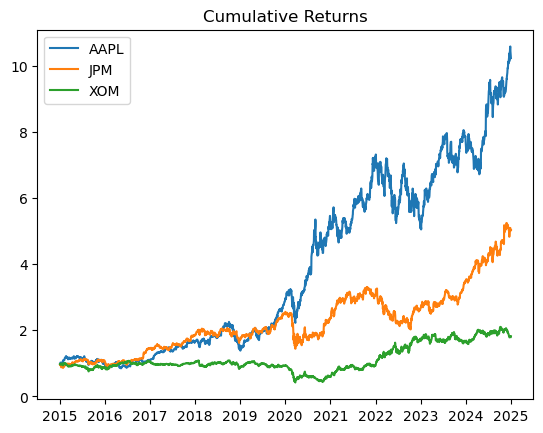

In [111]:
# Summary statistics
returns.describe()

# Plot cumulative returns for each asset
for col in returns.columns:
    plt.plot(cumulative_returns(returns[col]), label=col)
plt.title("Cumulative Returns")
plt.legend()
plt.show()

Large differences in cumulative performance, which encourages us to use factor models to break down returns into systematic components.

### CAPM

We compute alpha and beta for each asset using the Capital Asset Pricing Model, which explains excess returns solely through exposure to market portfolio.


In [112]:
capm_results = capm(returns, factors)
capm_results

,Alpha,Beta
AAPL,0.000442,1.192493
JPM,0.000187,1.107361
XOM,-0.000090,0.854571


### Fama-French 3-Factor Model

The Fama-French model extends CAPM by adding size (SMB) and value (HML) factors.


In [113]:
ffm_results = ffm(returns, factors)
ffm_results


,Alpha,Beta_MKT,Beta_SMB,Beta_HML
AAPL,0.000326,1.072791,-0.193184,-0.613531
JPM,0.000331,1.285035,0.183652,0.862945
XOM,0.000056,1.061635,0.131697,0.967573


### Principal Component Analysis (PCA)

We extract the main driving factors from returns using PCA.


 The explained variance of each principal component will indicate how much return variation is captured by the extracted factors.

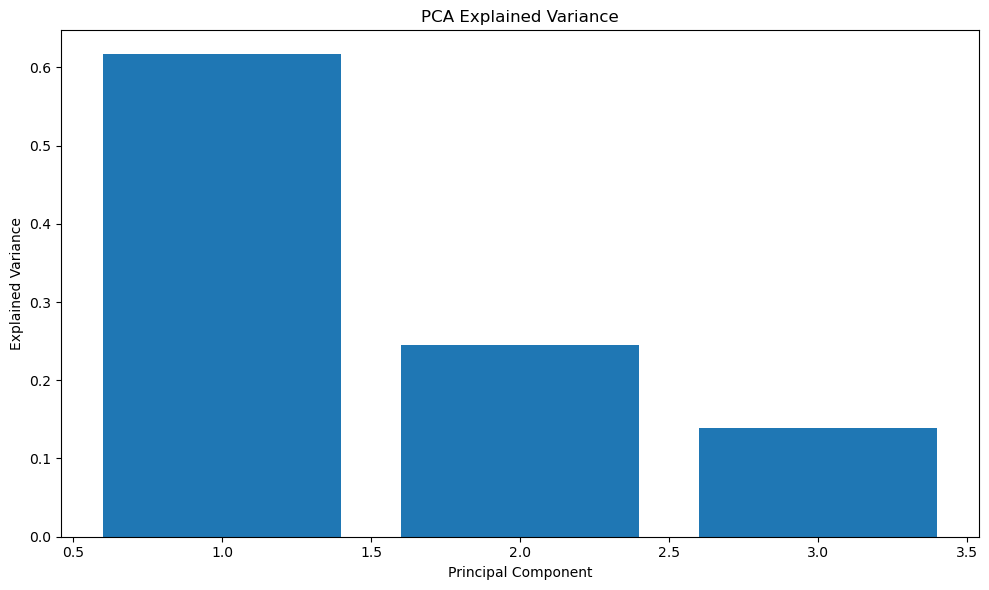

In [114]:
# Run PCA
eig_vals, eig_vecs = pca(returns)

# Plot explained variance
plt.figure(figsize=(10,6))
explained = eig_vals / eig_vals.sum()

plt.bar(range(1, len(explained) + 1), explained)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("PCA Explained Variance")
plt.tight_layout()

# Save figure
plt.savefig("../figures/pca_explained_variance.png")
plt.show()


## Risk Metrics

We will now compute volatility, Value at Risk (VaR), cumulative returns, and maximum drawdowns.


These metrics provide additional insight into downside risk and performance accross different market environments.

Volatility:
 AAPL    0.284670
JPM     0.273755
XOM     0.277881
dtype: float64

5% VaR:
 AAPL   -0.026996
JPM    -0.025339
XOM    -0.025922
Name: 0.05, dtype: float64


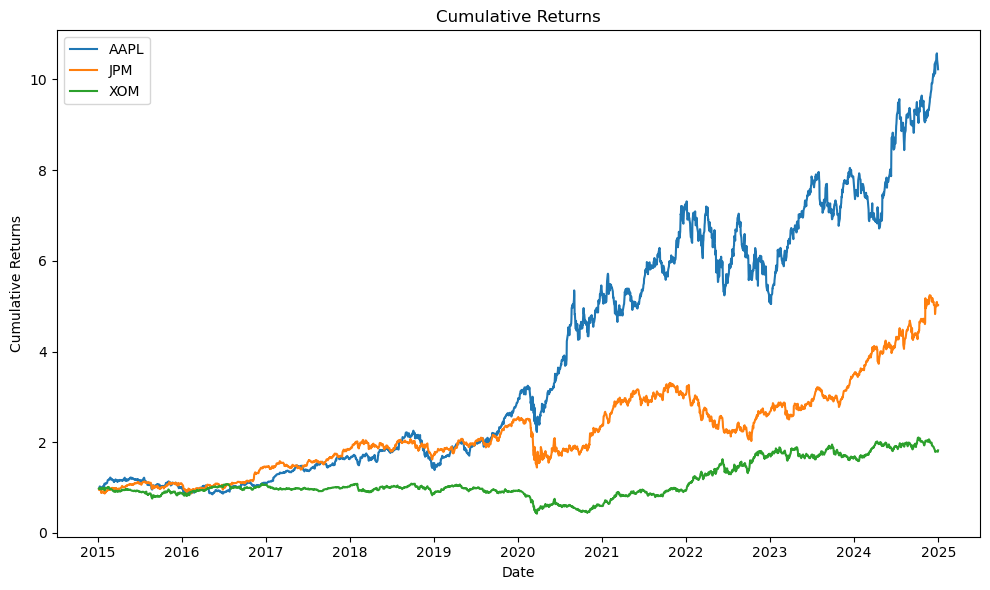


Max Drawdown:
 AAPL   -0.385159
JPM    -0.436265
XOM    -0.610066
dtype: float64


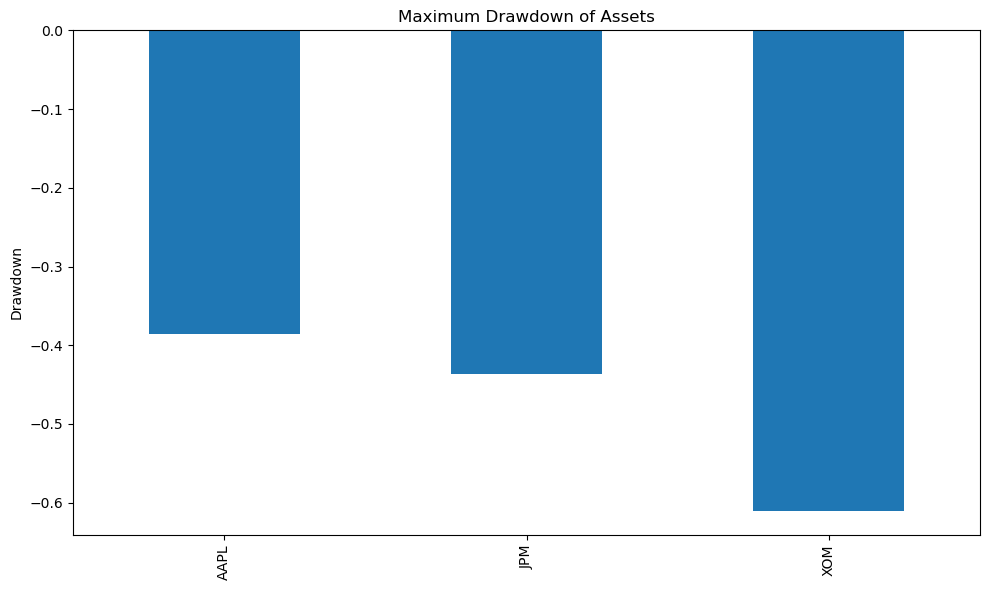

In [115]:
# Volatility
volatility = vol(returns)
print("Volatility:\n", volatility)

# Value at Risk (VaR)
var_5 = var(returns)
print("\n5% VaR:\n", var_5)

# Cumulative Returns
cum_returns = cumulative_returns(returns)

plt.figure(figsize=(10,6))
for col in cum_returns.columns:
    plt.plot(cum_returns.index, cum_returns[col], label=col)
plt.title("Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.tight_layout()
plt.savefig("../figures/cumulative_returns.png")
plt.show()

# Maximum Drawdown
drawdowns = returns.apply(max_drawdown)
print("\nMax Drawdown:\n", drawdowns)

plt.figure(figsize=(10,6))
drawdowns.plot(kind="bar", legend=False)
plt.title("Maximum Drawdown of Assets")
plt.ylabel("Drawdown")
plt.tight_layout()
plt.savefig("../figures/max_drawdown.png")
plt.show()


## Conclusion

Our analysis so far demonstrates that multi-factor models will provide a better explanation of returns compared to CAPM.


Takeaways:
- Market, size, and value factors explain a significant portion of asset returns
- PCA reveals that a small number of factors capture most return variation
- Risk-adjusted performance differs across assets despite similar volatility

Potential future extensions:
- Out-of-sample testing
- Rolling factor exposures
